<a href="https://colab.research.google.com/github/Sai-Prathik/Neural-Networks/blob/main/Sample_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from numpy import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/content/drive/MyDrive/ML Pandas Assignment/Datasets/Advertising.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
def minmaxscaler(data,range):
  scaler=MinMaxScaler(feature_range=range)
  scaler.fit(data)
  return scaler.transform(data)

In [4]:
data[["TV","radio","newspaper"]]=minmaxscaler(data[["TV","radio","newspaper"]],(-1,1))
data["sales"]=(data["sales"]-data["sales"].min())/(data["sales"].max()-data["sales"].min())

In [5]:
data

,TV,radio,newspaper,sales
0,0.551573,0.524194,0.211961,0.807087
1,-0.703754,0.584677,-0.211961,0.346457
2,-0.888400,0.850806,0.213720,0.303150
3,0.019953,0.665323,0.023747,0.665354
4,0.218126,-0.564516,0.021988,0.444882
...,...,...,...,...
195,-0.746365,-0.850806,-0.762533,0.236220
196,-0.367602,-0.802419,-0.862797,0.318898
197,0.192425,-0.625000,-0.892700,0.440945
198,0.913426,0.693548,0.159191,0.940945


In [15]:
def randomise(X, y):
    if len(X) != len(y):
        print("Input arguments are of different lengths")
    pairs = []
    for _ in range(len(X)):
        pairs.append((X[_], y[_]))

    random.shuffle(pairs)
    
    rand_X = []
    rand_y = []
    for i,j in pairs:
        rand_X.append(i)
        rand_y.append(j)

    return np.array(rand_X),np.array(rand_y)

In [27]:
def init_weights(n,k):
  l=[]
  for i in range(k):
   l.append(random.uniform(-1,1,n))
  return np.array(l)
  

In [26]:
def get_diagonal_vec(n,x):#diagonal vector
  #print("get_digonal_vec")
  a=np.zeros((n,n),float) 
  np.fill_diagonal(a,x)
  return a

In [25]:
def get_multiples(model): #v(z(1-z))
  #print("get_multiples")
  #print(model.b2)
  x1=np.dot(get_diagonal_vec(3,model.h1),(1-model.h1))
  y1=np.dot(get_diagonal_vec(3,model.w2),x1)
  return y1

In [24]:
def backtrack_error(model,X,e):
    #print("backtrack_error")
    cm=get_multiples(model)
     
    bias_vec=cm #biases(3X1)
    l=[]
    for i in cm:
       l.append(i*X)
       
    hidden_weights=np.array(l)#hidden weights(3X3)
     
    output_weights=model.h1 #output weights(3X1)
    
    #print(hidden_weights.shape,output_weights.shape)
    #print(model.h1,e)
    model.w1=model.w1-(model.lr_rate*(hidden_weights*e))
    model.w2=model.w2-(model.lr_rate*(output_weights*e))
    model.b1=model.b1-(model.lr_rate*(bias_vec*e))
    model.b2=model.b2-(model.lr_rate*e)
     
     

In [22]:
class FeedForward:
  def __init__(self,n_inputs,n_neurons,lr_rate):
    self.w1=init_weights(n_inputs,n_neurons)
    self.w2=init_weights(1,n_neurons)
    self.b1=init_weights(1,n_neurons)
    self.b2=init_weights(1,1)
    self.lr_rate=lr_rate
    self.h1=None
    self.h2=None
  
  def sigmoid(self,X):
     
    return 1/(1+np.exp(-X))

  def calc(self,X):
     
    self.h1=model.sigmoid(np.dot(self.w1,X.reshape(-1,1))+self.b1)
    self.h2=np.dot(self.w2.T,self.h1)+self.b2
     
    return self.h2

  def fit(self,X,y):
    
     l=[] 
     for i,j in zip(X,y):   
      e=self.calc(i)-j
      while e[0][0]>0.001 or e[0][0]<-0.001 :
        backtrack_error(self,i,e)
        e=self.calc(i)-j
      l.append(e)
     return np.array(l).reshape(-1,1).mean()
  
  def train_network(self,epoch,data_x,data_y):
    mean_error=[]
    for i in range(epoch):
      data_x,data_y=randomise(data_x,data_y)
      #data_x=np.array(data[["TV","radio","newspaper"]]) 
      #data_y=np.array(data["sales"]).reshape(-1,1)
      me=self.fit(data_x,data_y)
      print("epoch"+str(i+1)+" "+str(me))
      mean_error.append(me)
    return np.array(mean_error)


     
   

       
       
        
     
      

In [19]:
data_x=np.array(data[["radio","TV","radio"]])
data_y=np.array(data["sales"]).reshape(-1,1)

In [28]:
np.random.seed(1)
model=FeedForward(3,3,0.01)
#model.fit(data_x,data_y)
mean_error=model.train_network(50,data_x,data_y).reshape(-1,1) 



epoch1 -2.4271673435168824e-05
epoch2 -2.0378124666103197e-06
epoch3 1.0665718041467168e-05
epoch4 -1.697146812143939e-05
epoch5 -6.27192976315754e-05
epoch6 -4.26378045128694e-05
epoch7 6.625207579863186e-05
epoch8 -1.9478953944709262e-05
epoch9 3.91925563548768e-05
epoch10 9.925324577233011e-06
epoch11 4.31854716422065e-05
epoch12 -1.8794390429572248e-05
epoch13 1.4754981586520068e-05
epoch14 1.066222083409403e-05
epoch15 1.9590602696488783e-05
epoch16 -3.1673839660244924e-06
epoch17 -9.011755502019485e-05
epoch18 2.5804237253733223e-05
epoch19 1.1769399116324382e-06
epoch20 -4.103794230471622e-06
epoch21 -4.861902312734805e-05
epoch22 0.00010130759016613818
epoch23 -6.739664119818564e-06
epoch24 -4.686086783254044e-05
epoch25 -2.7361332294482608e-05
epoch26 3.804016576116294e-05
epoch27 -2.7060177832349126e-06
epoch28 -1.4440928370627534e-05
epoch29 4.875923960979272e-07
epoch30 -1.6969290764853804e-05
epoch31 1.8861059031807306e-05
epoch32 5.150444587563148e-05
epoch33 -6.000807555

Mean error for each epoch

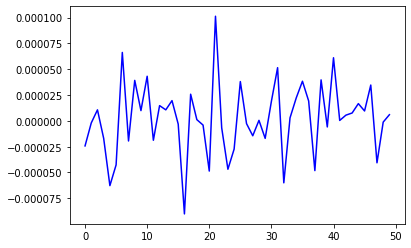

In [29]:
x=np.arange(0,mean_error.size)
plt.plot(x,mean_error,color="blue")

Error Reduction of a single data point


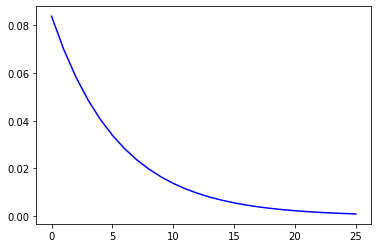

In [ ]:
np.random.seed(1)

model=FeedForward(3,3,0.1)
#model.fit(data_x,data_y)
y=model.fit(data_x[2],data_y[2]).reshape(-1,1) 
x=np.arange(0,y.size)
plt.plot(x,y,color='blue')